<a href="https://colab.research.google.com/github/gio-gama/BasesComputacionais/blob/master/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Giovanna Gama 

In [2]:
1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

futbr = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv')
futbr


,Data,Turno,Mandante,Placar do Mandante,Placar do Visitante,Visitante,Estádio,Horário,Gols do Mandante,Gols do Visitante,Público,Árbitro,Renda (R$)
0,14/04/2018,1,Cruzeiro,0,1,Grêmio,"Estádio Mineirão, Belo Horizonte",16:00,NaN,54' André,15446,PR Rodolpho Toski Marques,418305.0
1,14/04/2018,1,Vitória,2,2,Flamengo,"Estádio Barradão, Salvador",19:00,Yago 13' (pen) Denílson 76',1' Lucas Paquetá 72' Réver,12669,MT Wagner Reway,238994.0
2,14/04/2018,1,Santos,2,0,Ceará,"Estádio do Pacaembu, São Paulo",21:00,Pio 41' Rodrygo 49',NaN,12268,SC Rodrigo D'Alonso Ferreira,526550.0
3,15/04/2018,1,América Mineiro,3,0,Sport,"Estádio Independência, Belo Horizonte",11:00,"Serginho 1', 40' Carlinhos 36'",NaN,3230,DF Sávio Pereira Sampaio,36293.0
4,15/04/2018,1,Internacional,2,0,Bahia,"Estádio Beira-Rio, Porto Alegre",16:00,"Nico López 37', 60'",NaN,18460,GO Eduardo Tomaz de Aquino Valadão,796275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2/12/2018,2,Fluminense,1,0,América Mineiro,"Estádio do Maracanã, Rio de Janeiro",17:00,Richard 40',NaN,34870,PR Rafael Traci,139932.5
376,2/12/2018,2,Ceará,0,0,Vasco da Gama,"Estádio Castelão, Fortaleza",17:00,NaN,NaN,57223,SP Raphael Claus,1128494.0
377,2/12/2018,2,Palmeiras,3,2,Vitória,"Allianz Parque, São Paulo",17:00,Edu Dracena 42' Gustavo Scarpa 56' Bruno Henri...,70' (pen) Yago 72' Luan,41256,SC Héber Roberto Lopes,3514618.3
378,2/12/2018,2,Grêmio,1,0,Corinthians,"Arena do Grêmio, Porto Alegre",17:00,Jael 11',NaN,38974,MG Ricardo Marques Ribeiro,1450578.0


In [8]:
pcmd = futbr['Placar do Mandante'] > futbr['Placar do Visitante'] 
pcmd = pcmd.mean() * 100 

print('O mandante ganhou %.2f' % pcmd + '% dos jogos')

ng = futbr['Placar do Mandante'] >= futbr['Placar do Visitante']
ng = ng.mean() * 100

print('O mandante não perdeu %.2f' % ng + '% dos jogos')

O mandante ganhou 53.16% dos jogos
O mandante não perdeu 82.11% dos jogos


In [9]:
2
inf = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/inflacaoMensal.csv')
inf

,Ano,Mês,Inflação
0,1944,2,1.45
1,1944,3,1.43
2,1944,4,1.41
3,1944,5,1.39
4,1944,6,1.37
...,...,...,...
900,2019,2,1.25
901,2019,3,1.07
902,2019,4,0.90
903,2019,5,0.40


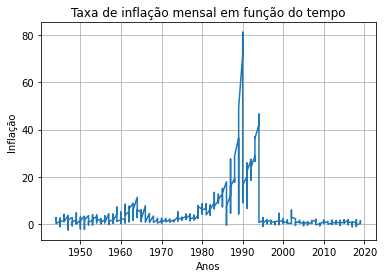

,Ano,Mês,Inflação
553,1990,3,81.32


In [10]:
plt.title("Taxa de inflação mensal em função do tempo")
plt.xlabel('Anos')
plt.ylabel('Inflação')
plt.grid()
plt.plot(inf['Ano'],inf['Inflação'])
plt.show()

inf.sort_values(['Inflação'], ascending=False).head(1)

In [11]:
net = pd.read_csv('https://raw.githubusercontent.com/FelipeBarone/BasesComputacionais/master/NetflixViewingHistory.csv')

net['Categoria'] = 'Filme'  
net['Categoria'][net['Title'].str.contains(": Temporada|: Stranger|: Parte")] = 'Série'  
net['Programa'] = net['Title']  
net[['Programa','Episódio']] = net[net['Categoria']=='Série']['Title'].str.split(pat = ': Temporada|: Stranger Things|: Parte', expand = True, n = 1)   
net.loc[net['Categoria']=='Filme', 'Programa'] = net.loc[net['Categoria']=='Filme', 'Title']  
net = net.drop(columns = 'Title')

net.groupby('Programa')['Episódio'].count().sort_values(ascending=False).head(10)

Programa
Naruto                                     155
Archer                                     126
Superstore: Uma Loja de Inconveniências    113
Naruto Shippuden                           104
Love                                        34
Rick and Morty                              30
BEASTARS - O Lobo Bom                       24
One-Punch Man                               24
Sem Maturidade Para Isso                    16
Final Space                                 15
Name: Episódio, dtype: int64

In [12]:
net['Date'] = pd.to_datetime(net['Date'], format='%d/%m/%Y') 
m = net['Date'].dt.month.value_counts(ascending=False)
net.head(1)

,Date,Categoria,Programa,Episódio
0,2022-11-06,Série,Amor e Anarquia,1: Arrependimentos


In [14]:
4
tbr = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv')
tbr

,Data,Turno,Mandante,Placar do Mandante,Placar do Visitante,Visitante,Estádio,Horário,Gols do Mandante,Gols do Visitante,Público,Árbitro,Renda (R$)
0,14/04/2018,1,Cruzeiro,0,1,Grêmio,"Estádio Mineirão, Belo Horizonte",16:00,NaN,54' André,15446,PR Rodolpho Toski Marques,418305.0
1,14/04/2018,1,Vitória,2,2,Flamengo,"Estádio Barradão, Salvador",19:00,Yago 13' (pen) Denílson 76',1' Lucas Paquetá 72' Réver,12669,MT Wagner Reway,238994.0
2,14/04/2018,1,Santos,2,0,Ceará,"Estádio do Pacaembu, São Paulo",21:00,Pio 41' Rodrygo 49',NaN,12268,SC Rodrigo D'Alonso Ferreira,526550.0
3,15/04/2018,1,América Mineiro,3,0,Sport,"Estádio Independência, Belo Horizonte",11:00,"Serginho 1', 40' Carlinhos 36'",NaN,3230,DF Sávio Pereira Sampaio,36293.0
4,15/04/2018,1,Internacional,2,0,Bahia,"Estádio Beira-Rio, Porto Alegre",16:00,"Nico López 37', 60'",NaN,18460,GO Eduardo Tomaz de Aquino Valadão,796275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2/12/2018,2,Fluminense,1,0,América Mineiro,"Estádio do Maracanã, Rio de Janeiro",17:00,Richard 40',NaN,34870,PR Rafael Traci,139932.5
376,2/12/2018,2,Ceará,0,0,Vasco da Gama,"Estádio Castelão, Fortaleza",17:00,NaN,NaN,57223,SP Raphael Claus,1128494.0
377,2/12/2018,2,Palmeiras,3,2,Vitória,"Allianz Parque, São Paulo",17:00,Edu Dracena 42' Gustavo Scarpa 56' Bruno Henri...,70' (pen) Yago 72' Luan,41256,SC Héber Roberto Lopes,3514618.3
378,2/12/2018,2,Grêmio,1,0,Corinthians,"Arena do Grêmio, Porto Alegre",17:00,Jael 11',NaN,38974,MG Ricardo Marques Ribeiro,1450578.0


In [15]:
y = futbr['Renda (R$)'].sum()
y = y/len(futbr['Renda (R$)'])

print('A médie de renda foi %.2f' %  y + " R$")

A médie de renda foi 570256.19 R$
